<a href="https://colab.research.google.com/github/AMNAALMGLY/Machine-Learning-From-Scratch/blob/main/UnsupervisedLearning_K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd 'drive/MyDrive'

/content/drive/MyDrive


#Importing libraries and reading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from ipywidgets import interact
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [ ]:
data=pd.read_csv('Data.csv')

#Investigating data

In [ ]:

data.head(),data.shape,data.isnull().sum()

(    f1   f2   f3   f4
 0  5.1  3.5  1.4  0.2
 1  4.9  3.0  1.4  0.2
 2  4.7  3.2  1.3  0.2
 3  4.6  3.1  1.5  0.2
 4  5.0  3.6  1.4  0.2, (150, 4), f1    0
 f2    0
 f3    0
 f4    0
 dtype: int64)

#Visualizing Data

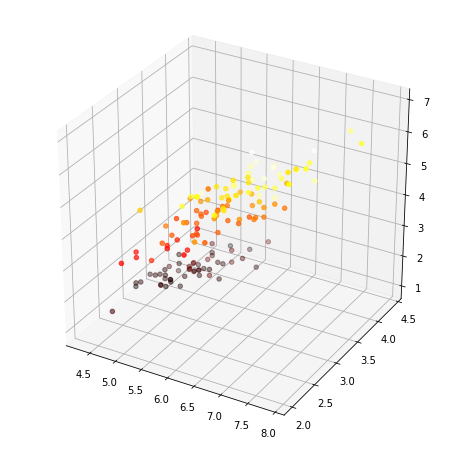

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],c=data.iloc[:,3],cmap=plt.hot())

We can see that data range is close to each other and it doesnot need to be rescaled  or standardize but can be seperated into distance based clusters .

#Implementing Kmeans from scratch

In [ ]:

class kmeans:

  def __init__(self,k,num_iterations=10,percision=0.001,init='random',seed=29):
    """Initializing the kmean model.
        Parameters
        ----------
        k : number of clusters
        num_iterations: number of iterations to run the updating
        percision:criteria to stop updating the centroid
        init:initialization method
        seed:random state seed
        Returns
        -------
        self : object
    """
    self.num_iterations=num_iterations
    self.k=k
    self.percision=percision
    self.init=init
    self.seed=seed
    self.centroids=0
  
  def initializeRnd(self,x):
    """Random Initializing the kmean model.
              Parameters
              ----------
              X :  data frame of shape (n_samples, n_features)
                  Training data, where n_samples is the number of samples
                  and n_features is the number of features.
              Returns
              -------
              self.centroids : initial centroids of the model 
    """

        ## take samples from data points
    self.centroids=x.sample(n=self.k,random_state=self.seed).values
    return self.centroids  

     
  def initializekplus(self,x):
    pass

  def distance(self , x,centroid):
     """Helper method: Computes the distance between data points and a centroid.
        Parameters
        ----------
        X :  data frame of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        centroid: 1D array of shape(n_features) representing a centroid
        Returns
        -------
        Eculedian Distance 
     """
     return np.sum((x.values-centroid)**2,axis=1)
  def assign(self,x):
    """Helper method: Assigns every data point to the nearest centroid.
        Parameters
        ----------
        X :  data frame of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        Returns
        -------
        x2:Data frame of the input concanted with the  new assigned centroid/labels 
    """
 
    x2=x.copy()
    ##looping through centroids to find distance from each
    for idx ,c in enumerate(self.centroids):
      x2[f'centroid_{idx}']=self.distance(x,c)
    ##appending min distance to the centroid column 
    x2['centroid']=np.argmin(x2.loc[:,'centroid_0':].values,axis=1)
    ##dropping other unnecessary columns of the centroids distances [centroid_0,centroid_1,...]
    x2=x2.drop(x2.iloc[:,x.shape[1]:-1].columns,axis=1)
    
    return x2
  def update(self,x):
     """Helper method: Updates centroids values.
        Parameters
        ----------
        X : data frame of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        Returns
        -------
        self.centroids:updated values of the centroids
     """
    ##loop through centroid list to update its values
     for idx,c in enumerate(self.centroids):
      self.centroids[idx]=np.mean(x.iloc[x.index[x['centroid']==idx] ,:-1])
      
     return self.centroids



  def fit_predict(self,x):
     """ learns the optimum centroids until certain percision is reached or max no of iterations is exceeded and the labels (clusters )the data accordingly.
        Parameters
        ----------
        X :  data frame of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        Returns
        -------
        x2:clusterd data with labels
        self.centroids:model centroids
        percision:percison of centroids
      """
     i=0
      ##initializing of centroids and percision values
     if self.init=='random':
          centroids=self.initializeRnd(x)
     percision=10
     while i < self.num_iterations or percision >self.percision  :
        
        prevC=centroids.copy()
        ##assigning data to centroids
        x2=self.assign(x)
        ##updating centroids
        centroids=self.update(x2)
        ##calculating percision
        percision=np.linalg.norm(prevC-centroids)
        i+=1
        

      # final labeling of input data 
     x2=self.assign(x)
     return x2,self.centroids,percision

    
  def score(self,x):
     """ Criteria to compare the model to other models
        Parameters
        ----------
        X :  data frame  of shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        Returns
        -------
        sum:summation of the distance from all data points overall centroids
        
     """
     sum=0
     for idx,c in enumerate(self.centroids):
          sum+=np.sum(self.distance(x.iloc[x.index[x['centroid']==idx] ,:-1],c))

     return sum
   
    
  def cluster(self,y):
    """ cluster input data into groups
        Parameters
        ----------
        X :  data frame of  shape (n_samples, n_features)
            Training data, where n_samples is the number of samples
            and n_features is the number of features.
        Returns
        -------
        data frame of input data concatentated with label column
        
     """
    
    return self.assign(y)
   #percision
   #choose k
   #quantization



#Instatiating of the model

In [ ]:
model=kmeans(k=2)
labels,centroids,percision=model.fit_predict(data)
print('model centroids are',centroids)
print('clusters are ',labels)

model centroids are [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]
clusters are        f1   f2   f3   f4  centroid
0    5.1  3.5  1.4  0.2         0
1    4.9  3.0  1.4  0.2         0
2    4.7  3.2  1.3  0.2         0
3    4.6  3.1  1.5  0.2         0
4    5.0  3.6  1.4  0.2         0
..   ...  ...  ...  ...       ...
145  6.7  3.0  5.2  2.3         1
146  6.3  2.5  5.0  1.9         1
147  6.5  3.0  5.2  2.0         1
148  6.2  3.4  5.4  2.3         1
149  5.9  3.0  5.1  1.8         1

[150 rows x 5 columns]


In [ ]:
y=model.fit_predict(transformed)

In [ ]:
print('model score on input data is ',model.score(labels))

model score on input data is  152.34795176035792


#Comparing with sklean predefined models

In [ ]:
from sklearn.cluster import KMeans
km= KMeans(
     init="random",
       n_clusters=2,
   max_iter=10,
   random_state=29
   )
km.fit(data)
print('sklean model centroids :',km.cluster_centers_)
print('sklearn model score :',km.score(X=data))

sklean model centroids : [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]
sklearn model score : -152.34795176035658


#clustring of new unseen data

In [ ]:
#our builtin model performance:
x=pd.DataFrame(np.random.rand(50,4))
model.cluster(x)

,0,1,2,3,centroid
0,0.799320,0.644465,0.724146,0.897326,0
1,0.848580,0.422023,0.320271,0.294140,0
2,0.321276,0.289820,0.860470,0.775640,0
3,0.743568,0.956332,0.058608,0.398969,0
4,0.897417,0.156966,0.813089,0.059899,0
5,0.335120,0.450767,0.886292,0.883839,0
6,0.332116,0.929665,0.040449,0.983080,0
7,0.003142,0.129673,0.577619,0.505633,0
8,0.671140,0.276154,0.317438,0.246479,0
9,0.708323,0.944247,0.390974,0.623893,0


In [ ]:
#sklearn model labeling:
km.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

#change the seed to see if initialization result in a different centroids

In [ ]:
model2=kmeans(k=2,seed=100)
labels,centroids,percision=model2.fit_predict(data)
print('model centroids are',centroids)
print('score is  ',model.score(labels))

model centroids are [[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36981132 1.56037736 0.29056604]]
score is   2467.658122036948


#observation
it can be concluded that both models centroids are identical regardless of the initialization ,the solution converge in this case of data with random initialization ,but te score is different

#Visualization of the 2 clusters with only 2 features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


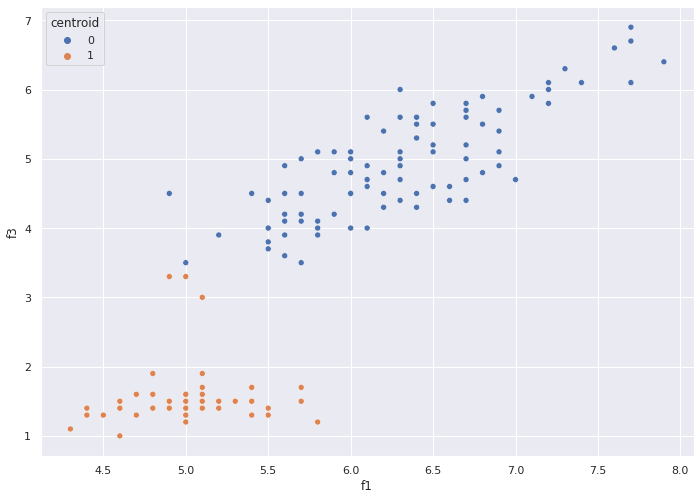

In [ ]:
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.scatterplot(model.centroids[:,0],model.centroids[:,1],color='red',marker='*',s=300)
sns.scatterplot(labels['f1'],labels['f3'],hue=labels['centroid'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


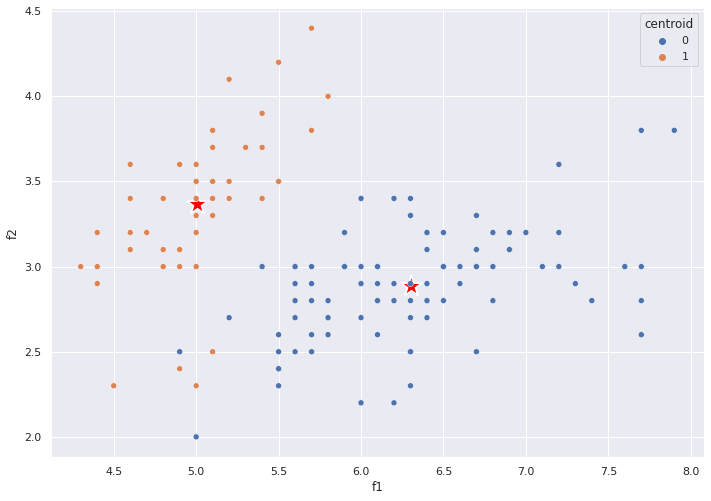

In [ ]:
sns.scatterplot(model.centroids[:,0],model.centroids[:,1],color='red',marker='*',s=500)
sns.scatterplot(labels['f1'],labels['f2'],hue=labels['centroid'])

the clusters appear clearly when choosing f1 & f2 features only with centroids in the middle of each group

#Visulaization of 3 clusters with 2 features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


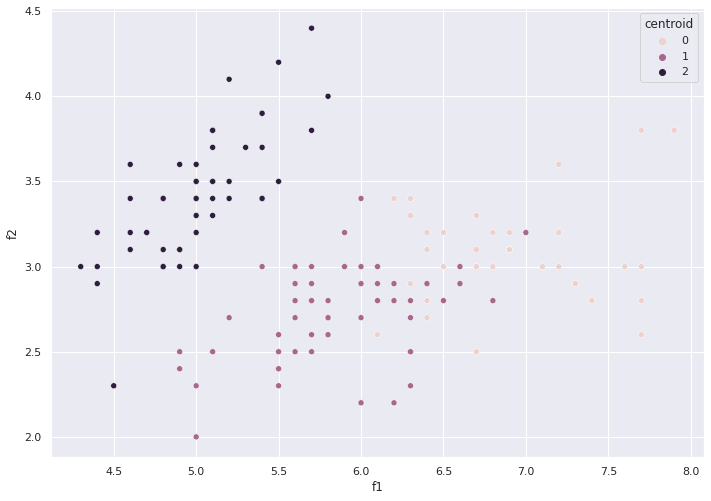

In [ ]:
model3=kmeans(k=3)
labels,centroids,percision=model3.fit_predict(data)
sns.scatterplot(labels['f1'],labels['f2'],hue=labels['centroid'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


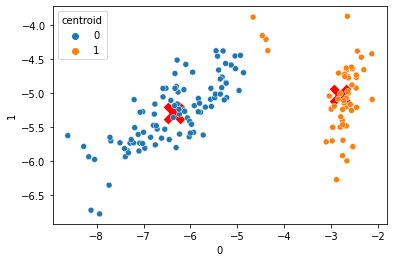

In [ ]:
sns.scatterplot(model.centroids[:,0],model.centroids[:,1],color='red',marker='X',s=600)
sns.scatterplot(new_data.iloc[:,0],new_data.iloc[:,1],hue=new_data['centroid'])